# Explore here

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Shape of the DataFrame: (1338, 7)

Column names and data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Summary statistics for numeric columns:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%

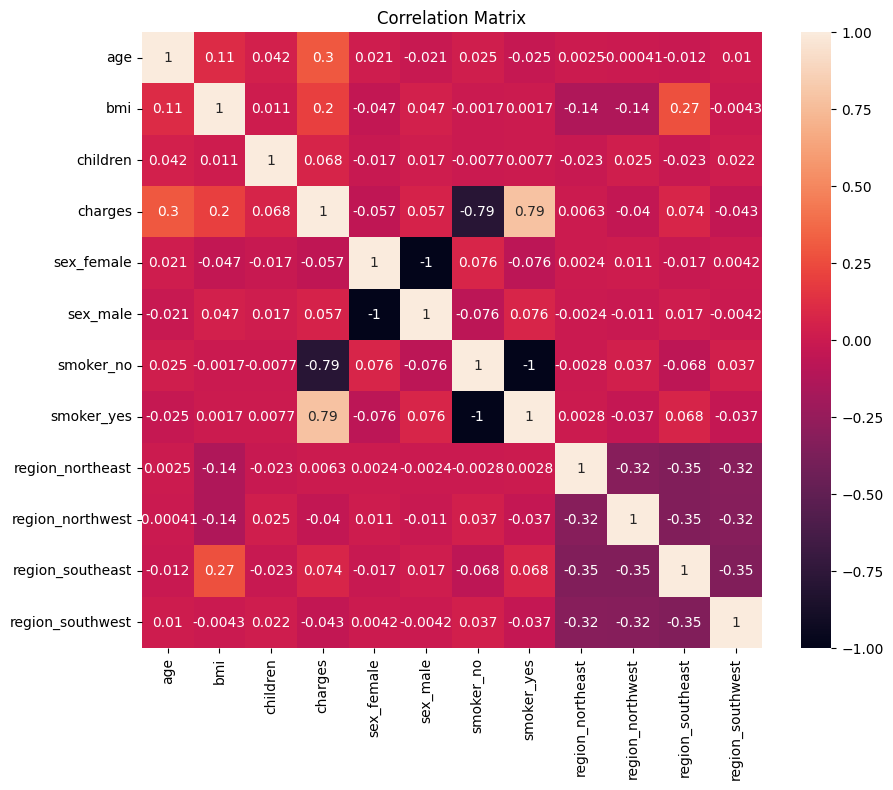

Data types of X_train:
age                 int64
bmi                 int64
children            int64
sex_female          int64
sex_male            int64
smoker_no           int64
smoker_yes          int64
region_northeast    int64
region_northwest    int64
region_southeast    int64
region_southwest    int64
dtype: object

Model Evaluation:
Mean Squared Error: 33566618.888228744
R^2 Score: 0.783788127827586

Model Coefficients:
age: 257.09563013084363
bmi: 335.6311680673546
children: 427.57770048769544
sex_female: 8.646535259311484
sex_male: -8.646535259311003
smoker_no: -11827.847165681213
smoker_yes: 11827.847165681213
region_northeast: 462.84278496325015
region_northwest: 98.67389406424569
region_southeast: -204.75802087714786
region_southwest: -356.75865815034695

Intercept: -370.75901415596127


In [4]:
# Your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#load the data
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
print(total_data.head())

#check shape of data and display columns and data types
print("Shape of the DataFrame:", total_data.shape)

print("\nColumn names and data types:")
print(total_data.dtypes)

# Summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
print(total_data.describe())

#check for missing values
print(total_data.isnull().sum())

#check for duplicates
df = pd.DataFrame(total_data)

total_data.drop_duplicates(inplace=True)
#print(df_no_duplicates)


# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=False)
df_encoded = df_encoded.astype(int)

#Split the data

features = df_encoded.drop(columns=["charges"]).columns.tolist()
target = "charges"

#correlation analysis
correlation_matrix = df_encoded.corr()

# Visualize correlation matrix (heatmap)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()



# We separate the predictors from the label
X = df_encoded[features]
y = df[target]

# We divide the sample into train and test at 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.80)

# Create a linear regression model
model = LinearRegression()

# Print data types of X_train (optional)
print("Data types of X_train:")
print(X_train.dtypes)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Print coefficients and intercept
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
print("\nIntercept:", model.intercept_)

The model suggests that age, BMI, number of children, smoking status, gender, and region significantly influence medical charges.
Smoking status (smoker_yes) has the largest impact on charges, followed by age, BMI, and number of children.The strongest correlation is between smokers and higher premuims. Gender and region also play a role, though their impact is relatively smaller compared to other variables.

The y-intecept is -370.76, meaning the premium or charges would be $-370.76 when all feature variables equal zero. The age coefficent means when age increases by 1 year we can expect premium or charges to increase by approx $257.